# Example 1

Predicting salary of person >100k based on company job and degree

In [18]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt

In [19]:
df = pd.read_csv("assignment/salaries_decision.csv")
df.head()

company                  job     degree  salary_more_then_100k
0  google      sales executive  bachelors                      0
1  google      sales executive    masters                      0
2  google     business manager  bachelors                      1
3  google     business manager    masters                      1
4  google  computer programmer  bachelors                      0

In [20]:
inputs = df.drop('salary_more_then_100k',axis='columns')

In [21]:
target = df['salary_more_then_100k']

In [22]:
from sklearn.preprocessing import LabelEncoder #training performs only on numbers not labels so we need to change all labels into corresponding numbers
le_company = LabelEncoder()
le_job = LabelEncoder()
le_degree = LabelEncoder()

In [23]:
inputs['company_n'] = le_company.fit_transform(inputs['company'])
inputs['job_n'] = le_job.fit_transform(inputs['job'])
inputs['degree_n'] = le_degree.fit_transform(inputs['degree'])

In [24]:
inputs

company                  job     degree  company_n  job_n  degree_n
0       google      sales executive  bachelors          2      2         0
1       google      sales executive    masters          2      2         1
2       google     business manager  bachelors          2      0         0
3       google     business manager    masters          2      0         1
4       google  computer programmer  bachelors          2      1         0
5       google  computer programmer    masters          2      1         1
6   abc pharma      sales executive    masters          0      2         1
7   abc pharma  computer programmer  bachelors          0      1         0
8   abc pharma     business manager  bachelors          0      0         0
9   abc pharma     business manager    masters          0      0         1
10    facebook      sales executive  bachelors          1      2         0
11    facebook      sales executive    masters          1      2         1
12    facebook     business manager  bachelors          1      0         0
13    facebook     business manager    masters          1      0         1
14    facebook  computer programmer  bachelors          1      1         0
15    facebook  computer programmer    masters          1      1         1

In [25]:
inputs_n = inputs.drop(['company','job','degree'],axis='columns') #dropping the original data from the dataset
inputs_n

company_n  job_n  degree_n
0           2      2         0
1           2      2         1
2           2      0         0
3           2      0         1
4           2      1         0
5           2      1         1
6           0      2         1
7           0      1         0
8           0      0         0
9           0      0         1
10          1      2         0
11          1      2         1
12          1      0         0
13          1      0         1
14          1      1         0
15          1      1         1

In [26]:
target

0     0
1     0
2     1
3     1
4     0
5     1
6     0
7     0
8     0
9     1
10    1
11    1
12    1
13    1
14    1
15    1
Name: salary_more_then_100k, dtype: int64

In [27]:
from sklearn import tree #importing tree module
model = tree.DecisionTreeClassifier()

In [28]:
model.fit(inputs_n, target) #training the model

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [29]:
model.score(inputs_n,target) #accuracy

1.0

In [30]:
model.predict([[2,2,1]]) #Predicing the salary of Sales executive having masters degree working in Google

array([0], dtype=int64)

In [31]:
model.predict([[2,1,1]])

array([1], dtype=int64)

In [37]:
import os

os.environ['PATH'] = os.environ['PATH']+';'+os.environ['CONDA_PREFIX']+r"\Library\bin\graphviz"

In [38]:
feature_cols = ['company','job','degree']

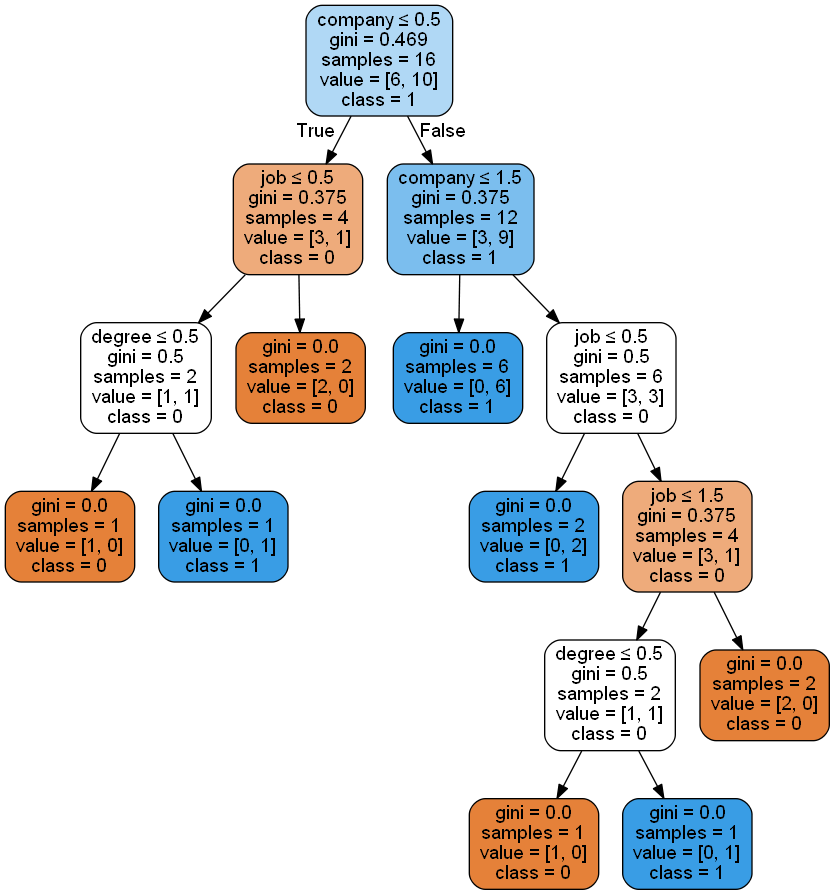

In [39]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
export_graphviz(model, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('jobsalary.png')
Image(graph.create_png())

Text(69.0, 0.5, 'Truth')

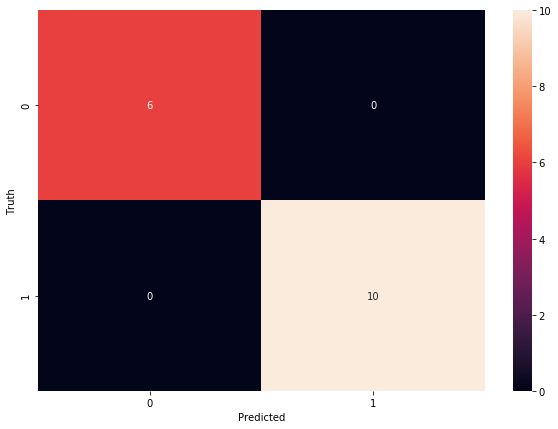

In [40]:
#for confusion matrix
y_predicted=model.predict(inputs_n)
y = target

from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y,y_predicted)

#For visualization,

import seaborn as sns
plt.figure(figsize=(10,7))
sns.heatmap(cm,annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

# Example 2

Predicting the suvival rate of a Passenger based on Class,Sex,Age and Fare

In [41]:
import pandas as pd
df = pd.read_csv("assignment/titanic.csv") 
df.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

In [42]:
df.drop(['PassengerId','Name','SibSp','Parch','Ticket','Cabin','Embarked'],axis=1,inplace=True)

In [43]:
x=df.drop('Survived',axis=1)
y=df['Survived']

In [44]:
x.Sex = x.Sex.map({'male': 1, 'female': 2}) #changing sex data into numbers
x.head()

Pclass  Sex   Age     Fare
0       3    1  22.0   7.2500
1       1    2  38.0  71.2833
2       3    2  26.0   7.9250
3       1    2  35.0  53.1000
4       3    1  35.0   8.0500

In [45]:
#Age columns has some NaN values. So we replace it with the mean.
x.Age=x.Age.fillna(x.Age.mean())
x.head()

Pclass  Sex   Age     Fare
0       3    1  22.0   7.2500
1       1    2  38.0  71.2833
2       3    2  26.0   7.9250
3       1    2  35.0  53.1000
4       3    1  35.0   8.0500

In [48]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [49]:
from sklearn import tree

model=tree.DecisionTreeClassifier()
model.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [50]:
model.score(x_test,y_test) #75% accurate

0.7486033519553073

In [51]:
#Predicting the survival chances of a Female First Class Passenger with Age 35 and Fare 80.25
model.predict([[1,2,35,80.25]])

array([1], dtype=int64)

In [52]:
feature_cols = ['Pclass','Sex','Age','Fare']

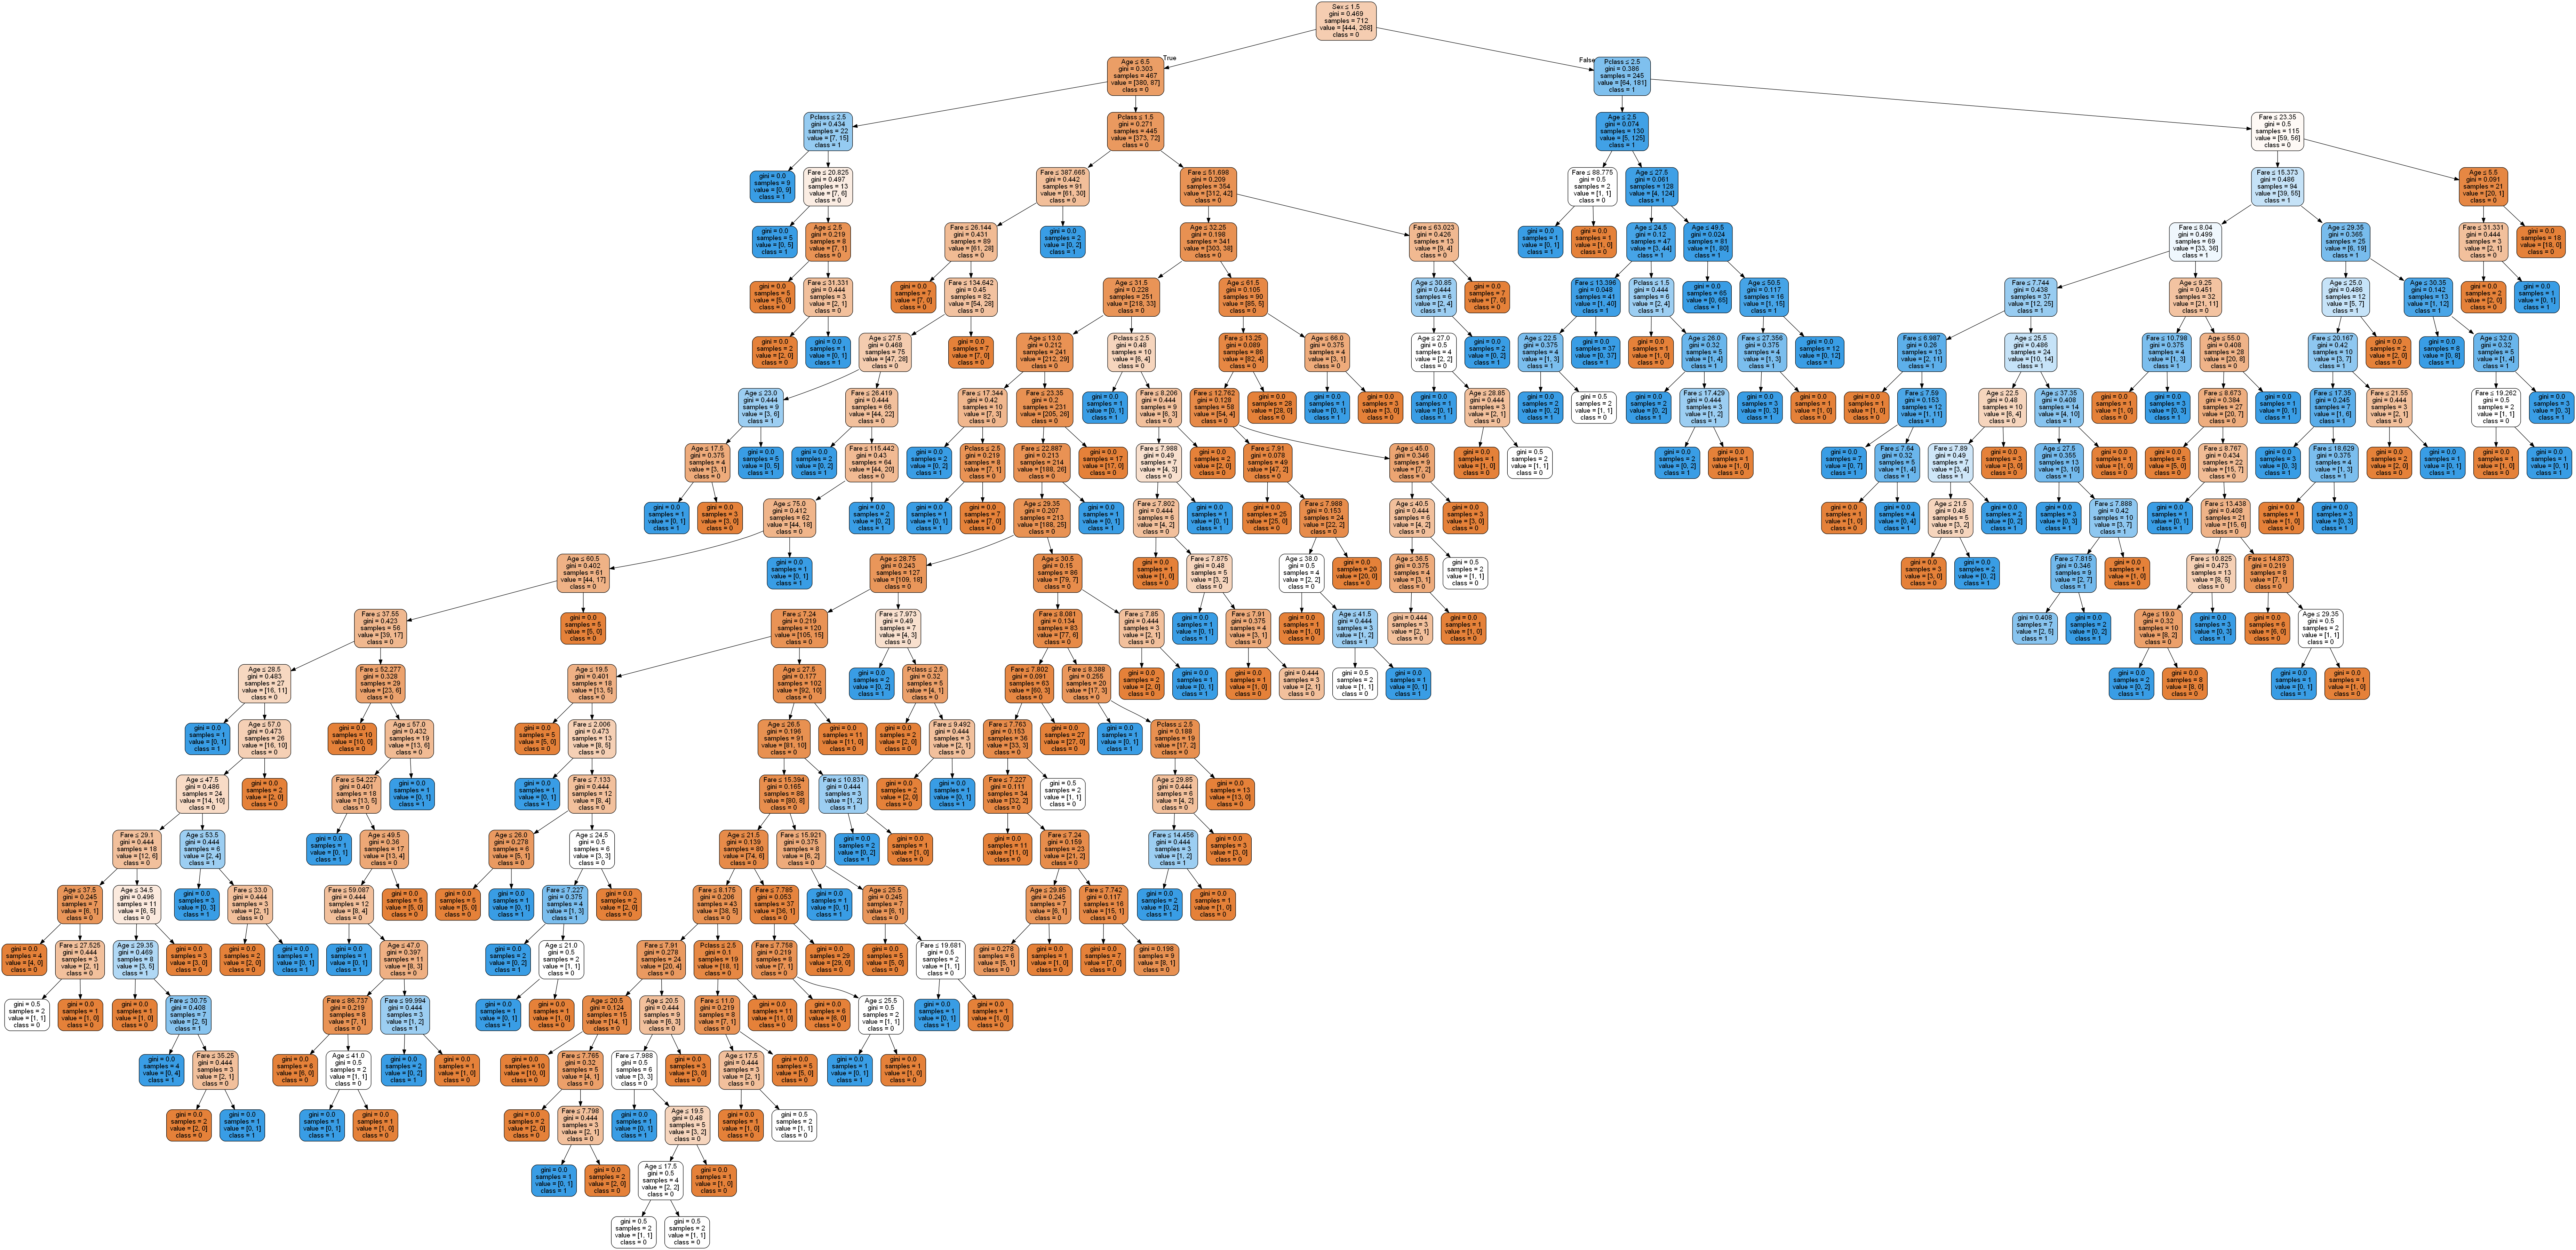

In [53]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
export_graphviz(model, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('titanic.png')
Image(graph.create_png())

Text(69.0, 0.5, 'Truth')

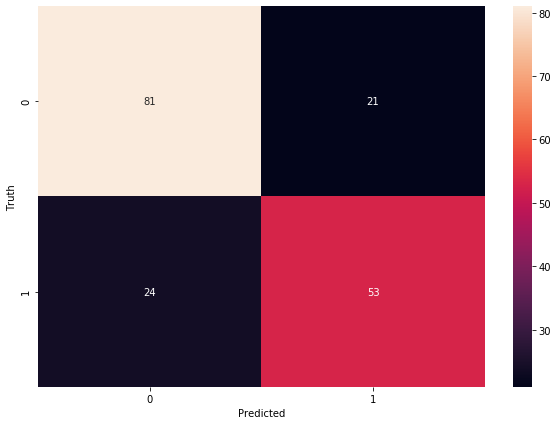

In [54]:
#for confusion matrix
y_predicted=model.predict(x_test)

from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_predicted,y_test)

#For visualization,

import seaborn as sns
plt.figure(figsize=(10,7))
sns.heatmap(cm,annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

# Examle 3

In [55]:
#reading the dataset
df=pd.read_csv("assignment/diabetes.csv")
df.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

In [56]:
x=df.drop('Outcome',axis=1)
y=df['Outcome']

In [57]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [58]:
from sklearn import tree
model=tree.DecisionTreeClassifier()
model.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [59]:
model.predict(x_test)

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0],
      dtype=int64)

In [60]:
model.score(x_test,y_test) # 75% accurate

0.7402597402597403

In [61]:
feature_cols = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']

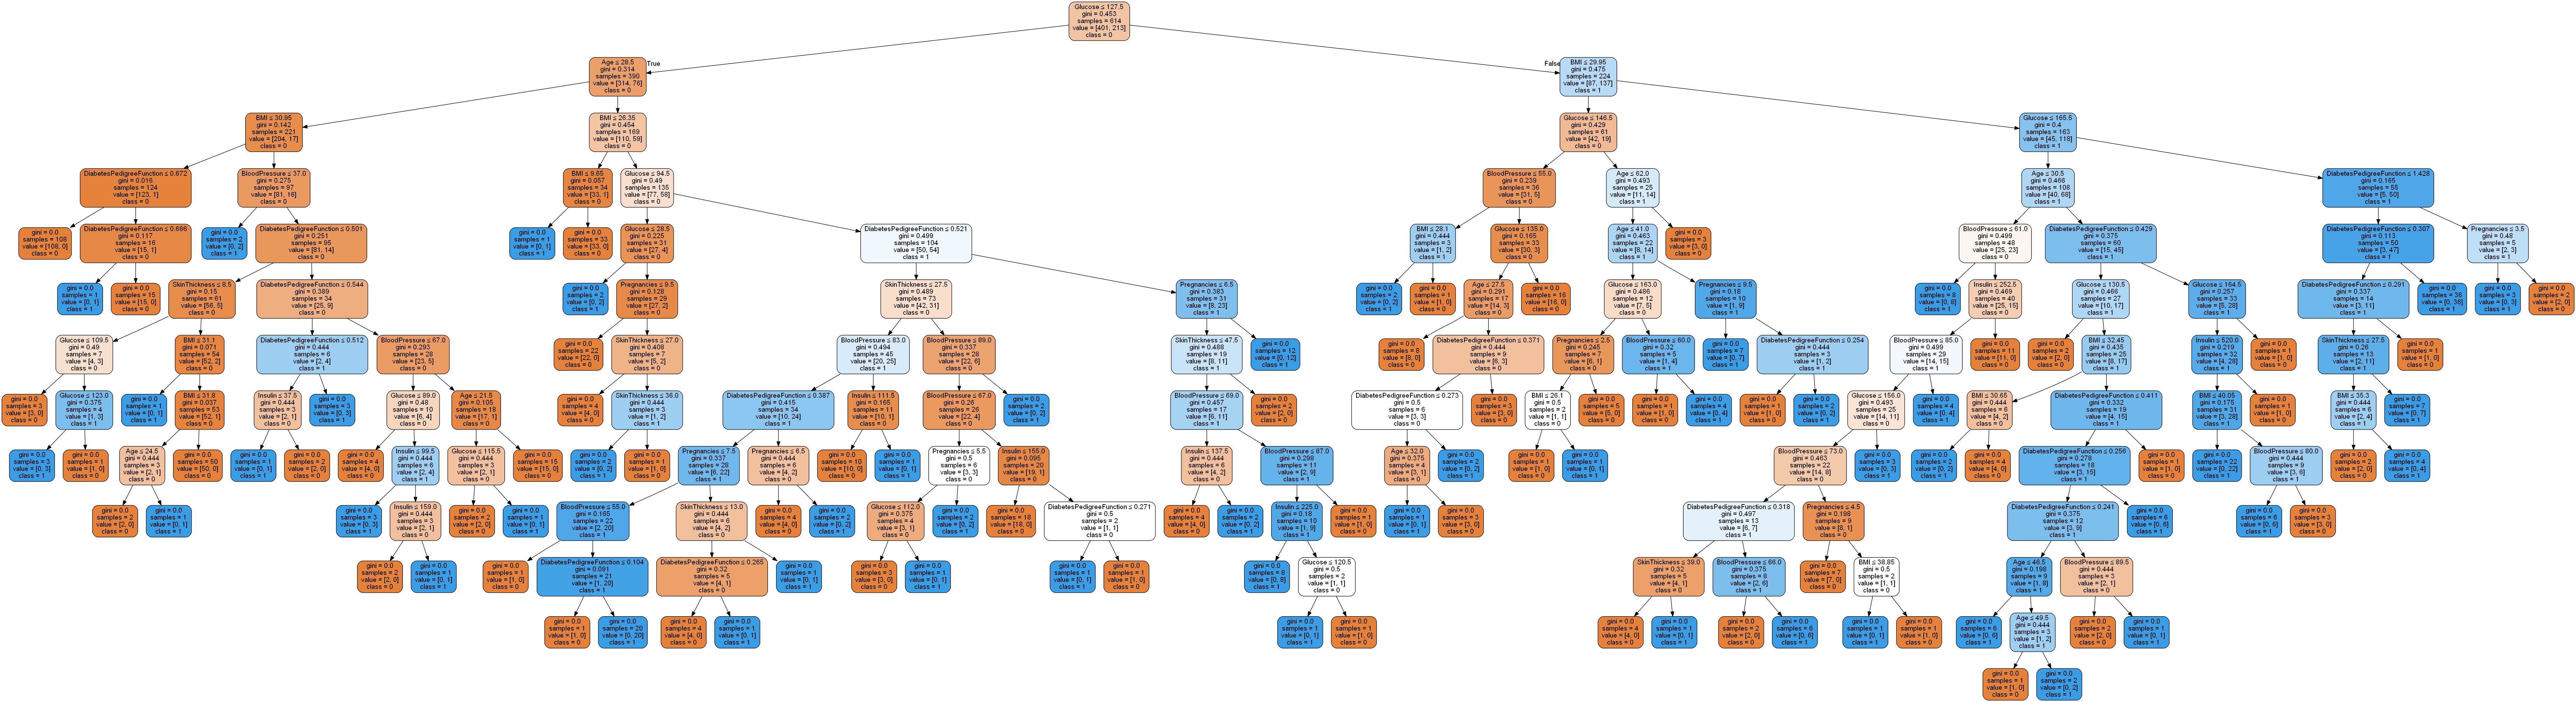

In [62]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
export_graphviz(model, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('diabetes.png')
Image(graph.create_png())

Text(69.0, 0.5, 'Truth')

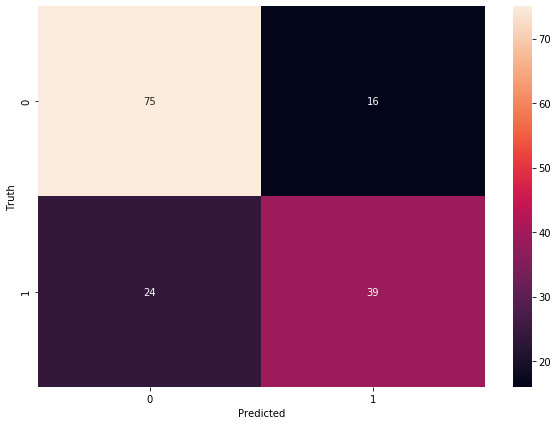

In [63]:
#for confusion matrix
y_predicted=model.predict(x_test)

from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_predicted,y_test)

#For visualization,

import seaborn as sns
plt.figure(figsize=(10,7))
sns.heatmap(cm,annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')